Exercise 1— Confusion Matrix Metrics

TP (True Positive) — was sick → predicted illness
TN (True Negative) — was not sick → predicted healthy
FP (False Positive) — was not sick → predicted illness
FN (False Negative) — was sick → predicted healthy

Exercise 1- Metrics from Confusion Matrix

Confusion Matrix:
TN = 85
FP = 5
FN = 8
TP = 2

1. Accuracy:
Accuracy = (TP + TN) / Total
Accuracy = (2 + 85) / 100 = 0.87

2. Precision:
Precision = TP / (TP + FP)
Precision = 2 / (2 + 5) = 0.2857

3. Recall:
Recall = TP / (TP + FN)
Recall = 2 / (2 + 8) = 0.20

4. F1-score:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1 = 2 * (0.2857 * 0.2) / (0.2857 + 0.2) = 0.24

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df.dropna(inplace=True)

X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

predictions = model.predict(X_test)


C:\Users\user\AppData\Local\Temp\ipykernel_18292\2109832436.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Precision, Recall, F1-score for class 1 (Survived):

Precision: 0,2857
Recall: 0,20
F1-score: 0,24

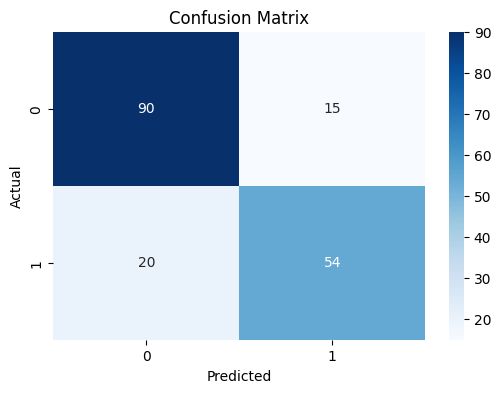

In [8]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

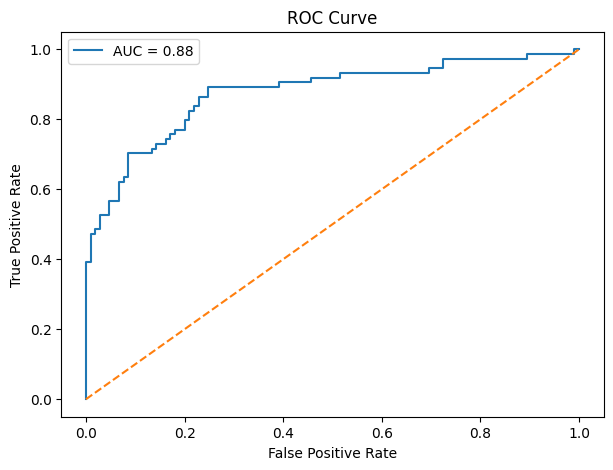

In [9]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Exercise 3— The Strategist (Critical Thinking)
1. A situation where Precision is more important than Recall
A good example is a system that detects fraudulent credit card transactions.
If the model incorrectly flags a legitimate customer as a fraudster (a False Positive), it causes frustration, blocked cards, and damage to user trust.
In this case, it’s more important to be correct when predicting fraud than to catch every possible case — so Precision matters more.

2. A situation where Recall is more important than Precision
A medical screening test for a serious disease is a classic example.
Missing a real positive case (a False Negative) could delay treatment and put the patient’s life at risk.
It’s better to raise more false alarms and test people further than to accidentally miss someone who truly has the disease — so Recall is more important.